# Clear Creek LSTM through Neural Hydrology
Rhys Pulling

This notebook is meant to test a simple version of the clear creek LSTM before training it fully on the GPU. The LSTM is trained through Neural Hydrology. It should both train the LSTM evaluate the LSTM. 

In [1]:
# !pip install tensorboard
# !pip install neuralhydrology
# !pip install netCDF4 h5netcdf

In [2]:
import torch
import pickle
import pandas as pd
import numpy as np
import tensorboard
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run

## Train

2025-03-19 15:38:16,828: Logging to /home/m10870071/lstm/ngen_python/trained_nh_models/clear_creek/clear_creek_1903_153816/output.log initialized.
2025-03-19 15:38:16,829: ### Folder structure created at /home/m10870071/lstm/ngen_python/trained_nh_models/clear_creek/clear_creek_1903_153816
2025-03-19 15:38:16,831: ### Run configurations for clear_creek
2025-03-19 15:38:16,832: experiment_name: clear_creek
2025-03-19 15:38:16,833: dataset: generic
2025-03-19 15:38:16,834: model: cudalstm
2025-03-19 15:38:16,835: package_version: 1.10.0
2025-03-19 15:38:16,836: number_of_basins: 2
2025-03-19 15:38:16,837: device: cpu
2025-03-19 15:38:16,838: optimizer: Adam
2025-03-19 15:38:16,839: output_activation: linear
2025-03-19 15:38:16,840: epochs: 15
2025-03-19 15:38:16,841: head: regression
2025-03-19 15:38:16,842: allow_subsequent_nan_losses: 10
2025-03-19 15:38:16,843: batch_size: 128
2025-03-19 15:38:16,844: clip_gradient_norm: 1
2025-03-19 15:38:16,845: hidden_size: 126
2025-03-19 15:38:16,

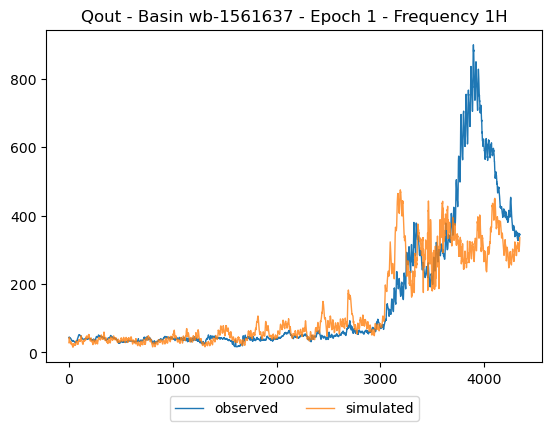

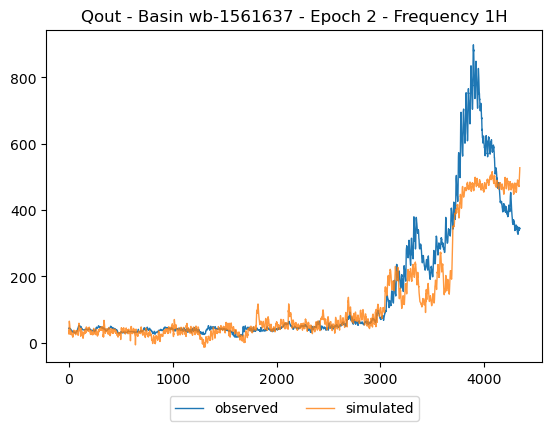

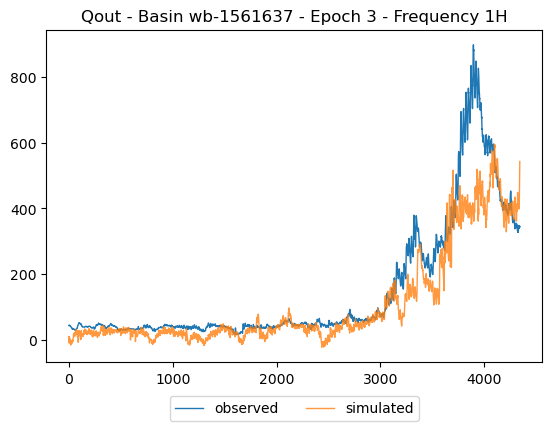

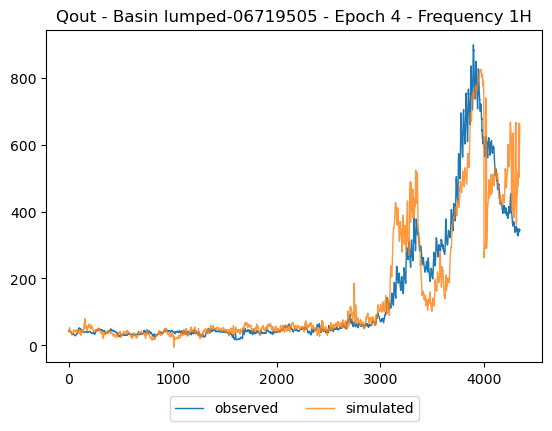

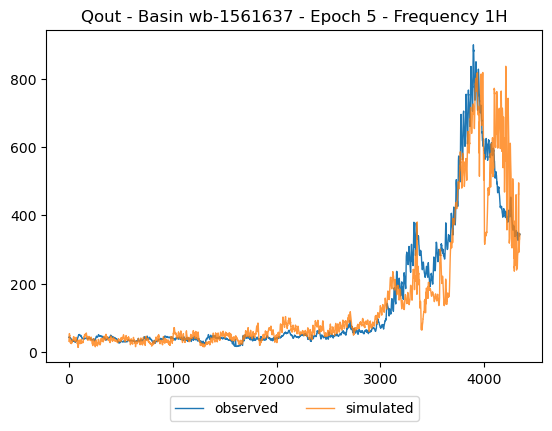

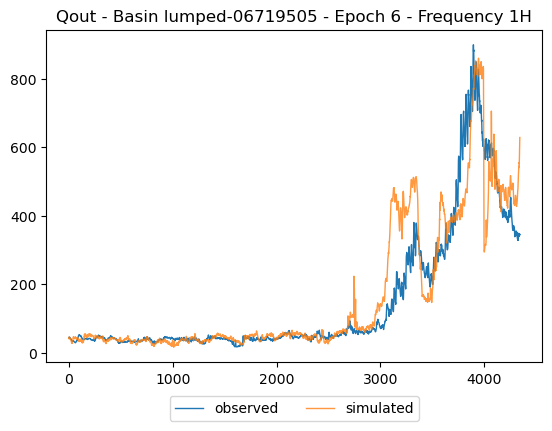

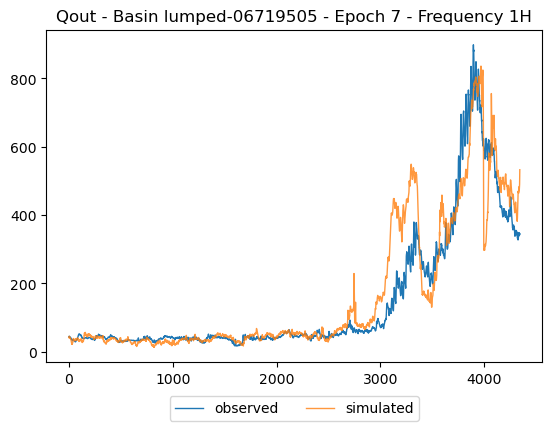

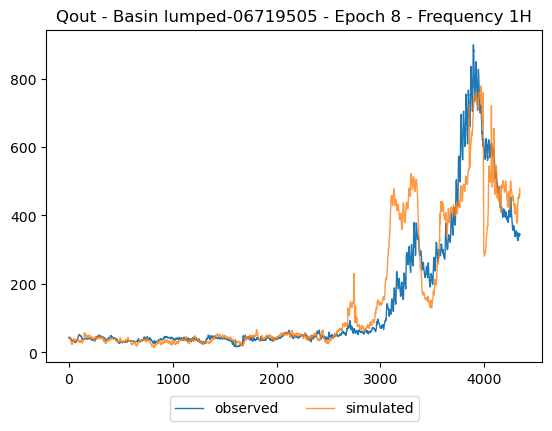

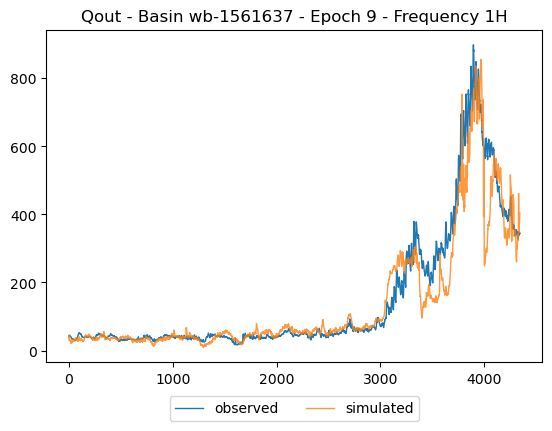

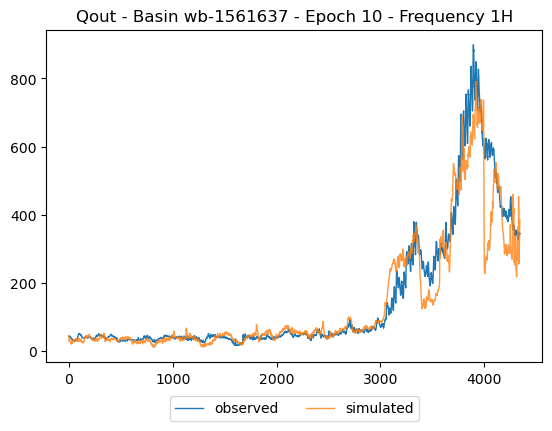

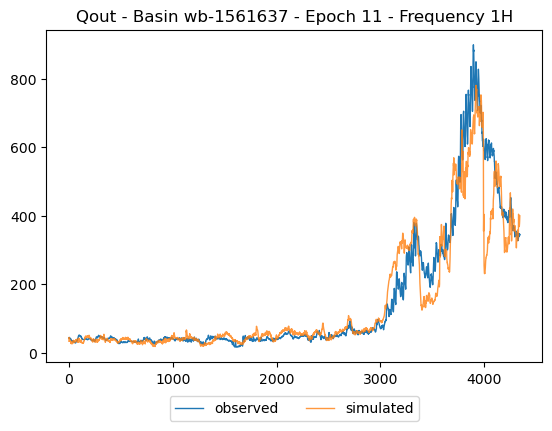

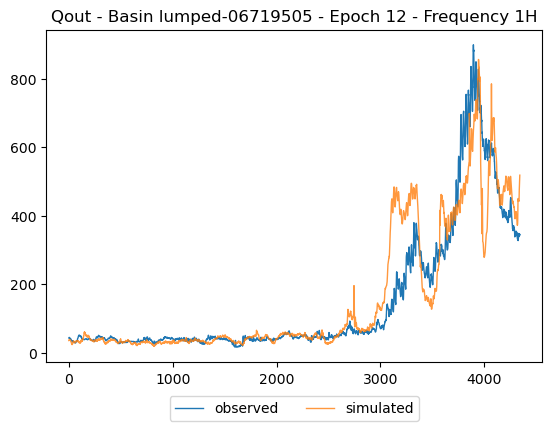

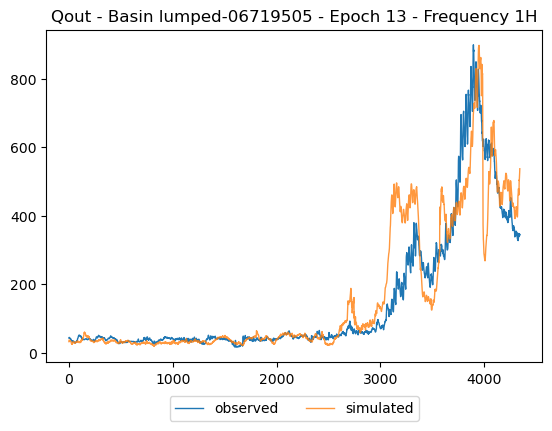

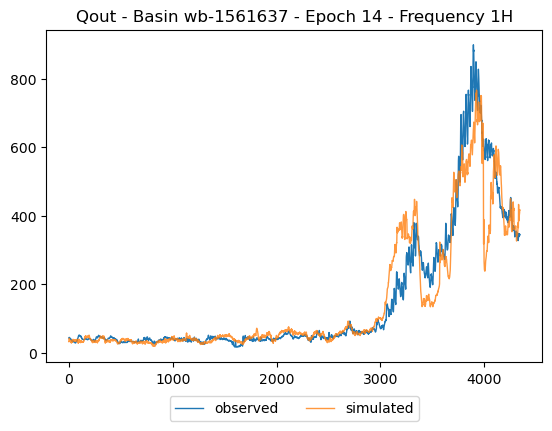

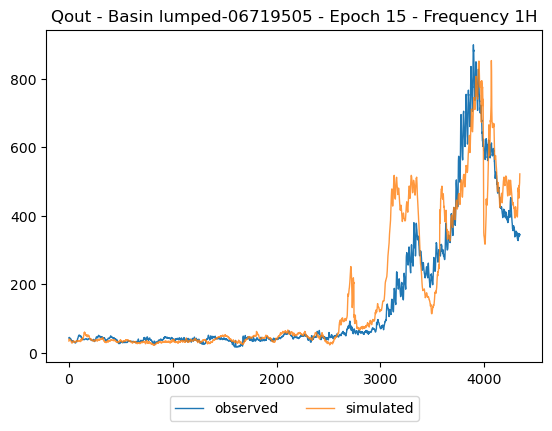

In [3]:
cfg_file = "./clear_creek/config.yml"

if torch.cuda.is_available():
    start_run(config_file=Path(cfg_file))
else:
    start_run(config_file=Path(cfg_file))

## Evaluate

You will have to set the directory to the correct path. The only thing that will change is the numbers at the end. 

In [5]:
run_dir = Path("./clear_creek/clear_creek_1903_153816")
eval_run(run_dir=run_dir, period="test")

2025-03-19 16:17:25,069: Using the model weights from clear_creek/clear_creek_1903_153816/model_epoch015.pt
# Evaluation: 100%|██████████| 2/2 [00:07<00:00,  3.93s/it]
2025-03-19 16:17:32,939: Stored metrics at clear_creek/clear_creek_1903_153816/test/model_epoch015/test_metrics.csv
2025-03-19 16:17:32,945: Stored results at clear_creek/clear_creek_1903_153816/test/model_epoch015/test_results.p


In [7]:
with open(run_dir / "test" / "model_epoch015" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)

results.keys()

dict_keys(['lumped-06719505', 'wb-1561637'])

In [8]:
results['lumped-06719505']['1H']['xr']

<xarray.Dataset>
Dimensions:    (date: 4416, time_step: 1)
Coordinates:
  * date       (date) datetime64[ns] 2022-07-01 ... 2022-12-31T23:00:00
  * time_step  (time_step) int64 0
Data variables:
    Qout_obs   (date, time_step) float32 345.0 340.5 345.5 349.0 ... nan nan nan
    Qout_sim   (date, time_step) float32 526.8 526.7 535.1 550.0 ... nan nan nan

Text(0.5, 1.0, 'Test period - NSE 0.082')

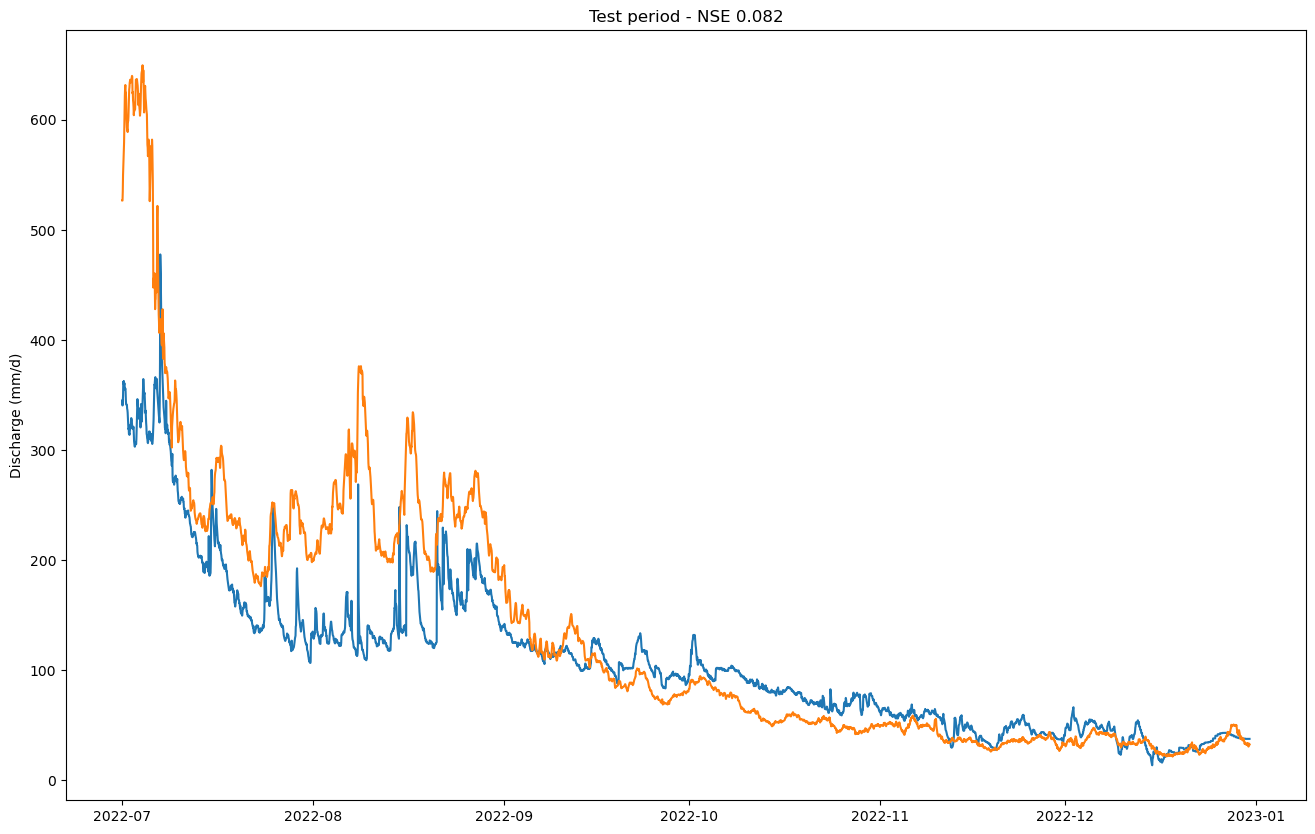

In [9]:
# extract observations and simulations
qobs = results['lumped-06719505']['1H']['xr']['Qout_obs']
qsim = results['lumped-06719505']['1H']['xr']['Qout_sim']

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (mm/d)")
ax.set_title(f"Test period - NSE {results['lumped-06719505']['1H']['NSE']:.3f}")

In [10]:
values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

NSE: 0.082
MSE: 4830.087
RMSE: 69.499
KGE: 0.230
Alpha-NSE: 1.729
Beta-KGE: 1.238
Beta-NSE: 0.359
Pearson-r: 0.925
FHV: 74.868
FMS: 75.244
FLV: 56.414
Peak-Timing: nan
Peak-MAPE: 12.502
